In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

### Bai 1

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

X_train = X_train_orig / 255
X_test = X_test_orig / 255

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


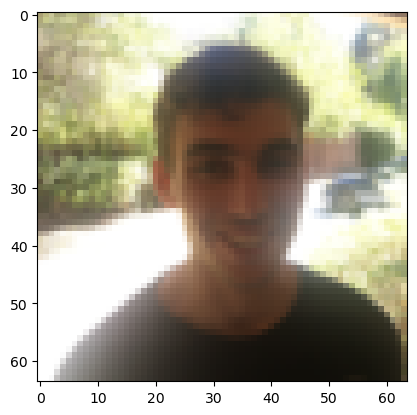

In [4]:
index = 287
plt.imshow(X_train_orig[index])
plt.show()

In [6]:
def happyModel():

    model = tf.keras.Sequential()
    model.add(tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)))
    model.add(tfl.Conv2D(32, (7, 7))) # Phep tich chap voi 32 bo loc kich thuoc 7x7
    model.add(tfl.BatchNormalization(axis=-1))
    model.add(tfl.ReLU())
    model.add(tfl.MaxPool2D())
    model.add(tfl.Flatten())
    model.add(tfl.Dense(1, activation='sigmoid'))

    return model

In [7]:
model = happyModel()
model.summary()

c:\Users\84936\anaconda3\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 70, 70, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

In [9]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.4084 - loss: 3.5203 - val_accuracy: 0.7167 - val_loss: 0.5890
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.7809 - loss: 0.5455 - val_accuracy: 0.4833 - val_loss: 0.9044
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.8818 - loss: 0.2514 - val_accuracy: 0.6417 - val_loss: 0.5564
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.9378 - loss: 0.1613 - val_accuracy: 0.7750 - val_loss: 0.5057
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.9593 - loss: 0.1202 - val_accuracy: 0.7917 - val_loss: 0.4886
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.9824 - loss: 0.0911 - val_accuracy: 0.8083 - val_loss: 0.4599
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9861 - loss: 0.0713 - val_accuracy: 0.8417 - val_loss: 0.4163
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.9584 - loss: 0.1072 - val_accuracy: 0.

In [11]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9266 - loss: 0.2464


[0.24516934156417847, 0.9333333373069763]

### Bai 2

In [12]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

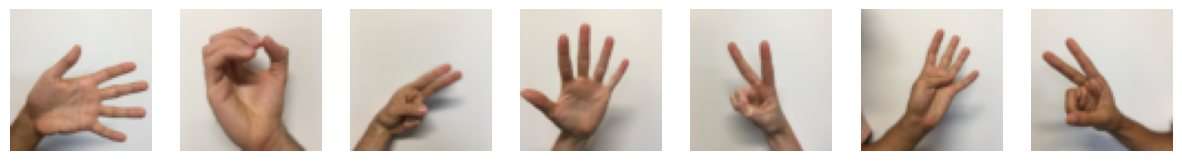

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(15, 3))

for i in range(7):
    axes[i].imshow(X_train_orig[i])
    axes[i].axis('off')

plt.show()


In [15]:
X_train = X_train_orig/255
X_test = X_test_orig/255

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [36]:
def convolution_model(input_shape):
    inputs = tfl.Input(shape=input_shape)
    layer = tfl.Conv2D(filters=8, kernel_size=4, strides=1, padding='same', activation='relu')(inputs)
    layer = tfl.MaxPool2D(pool_size=4, padding='same', strides=4)(layer)
    layer = tfl.Conv2D(filters=16, kernel_size=2, strides=1, padding='same', activation='relu')(layer)
    layer = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(layer)
    flatten = tfl.Flatten()(layer)
    outputs = tfl.Dense(6, activation='softmax')(flatten)

    model = tf.keras.Model(inputs=inputs, outputs = outputs)
    return model

In [37]:
model = convolution_model([64, 64, 3])
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,462 (9.62 KB)

 Trainable params: 2,462 (9.62 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1361 - loss: 1.7971 - val_accuracy: 0.2037 - val_loss: 1.7883
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2454 - loss: 1.7803 - val_accuracy: 0.2037 - val_loss: 1.7656
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2969 - loss: 1.7583 - val_accuracy: 0.2037 - val_loss: 1.7477
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3420 - loss: 1.7163 - val_accuracy: 0.4954 - val_loss: 1.6738
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4510 - loss: 1.6626 - val_accuracy: 0.3981 - val_loss: 1.6017
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4581 - loss: 1.5607 - val_accuracy: 0.5093 - val_loss: 1.4701
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5220 - loss: 1.4258 - val_accuracy: 0.5185 - val_loss: 1.3473
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5568 - loss: 1.2946 - val_accuracy: 0.

In [40]:
model.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9140 - loss: 0.2527


[0.2975662648677826, 0.8916666507720947]